In [4]:
%load_ext autoreload
%autoreload 2
from typing import Tuple
from main.tree import Tree, TreeTypes
from main.score import Score
from main.stats import (
    histogram_top_bottom,
    display_str,
    input_data,
    AggTuple, ScoreGetter, agg_list,
    get_roc_data
)
import tabulate

def f(
  ttype: list[TreeTypes],
  btype: list[TreeTypes],
  agg_tuple: AggTuple,
  score_getter: Tuple[str, ScoreGetter],
): return ttype, btype, agg_tuple, score_getter

sa, sc, ra, mf, syba = Score.getters()
min, max, avg = agg_list
def expandable_mols(tree: Tree): return [smiles.score for smiles in tree.expandable]
def all_mols(tree: Tree): return [smiles.score for smiles in (tree.expandable + tree.in_stock)]

detailed=False
if not detailed:
    [(_, source)] = list(input_data(False))
    display_str(source)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


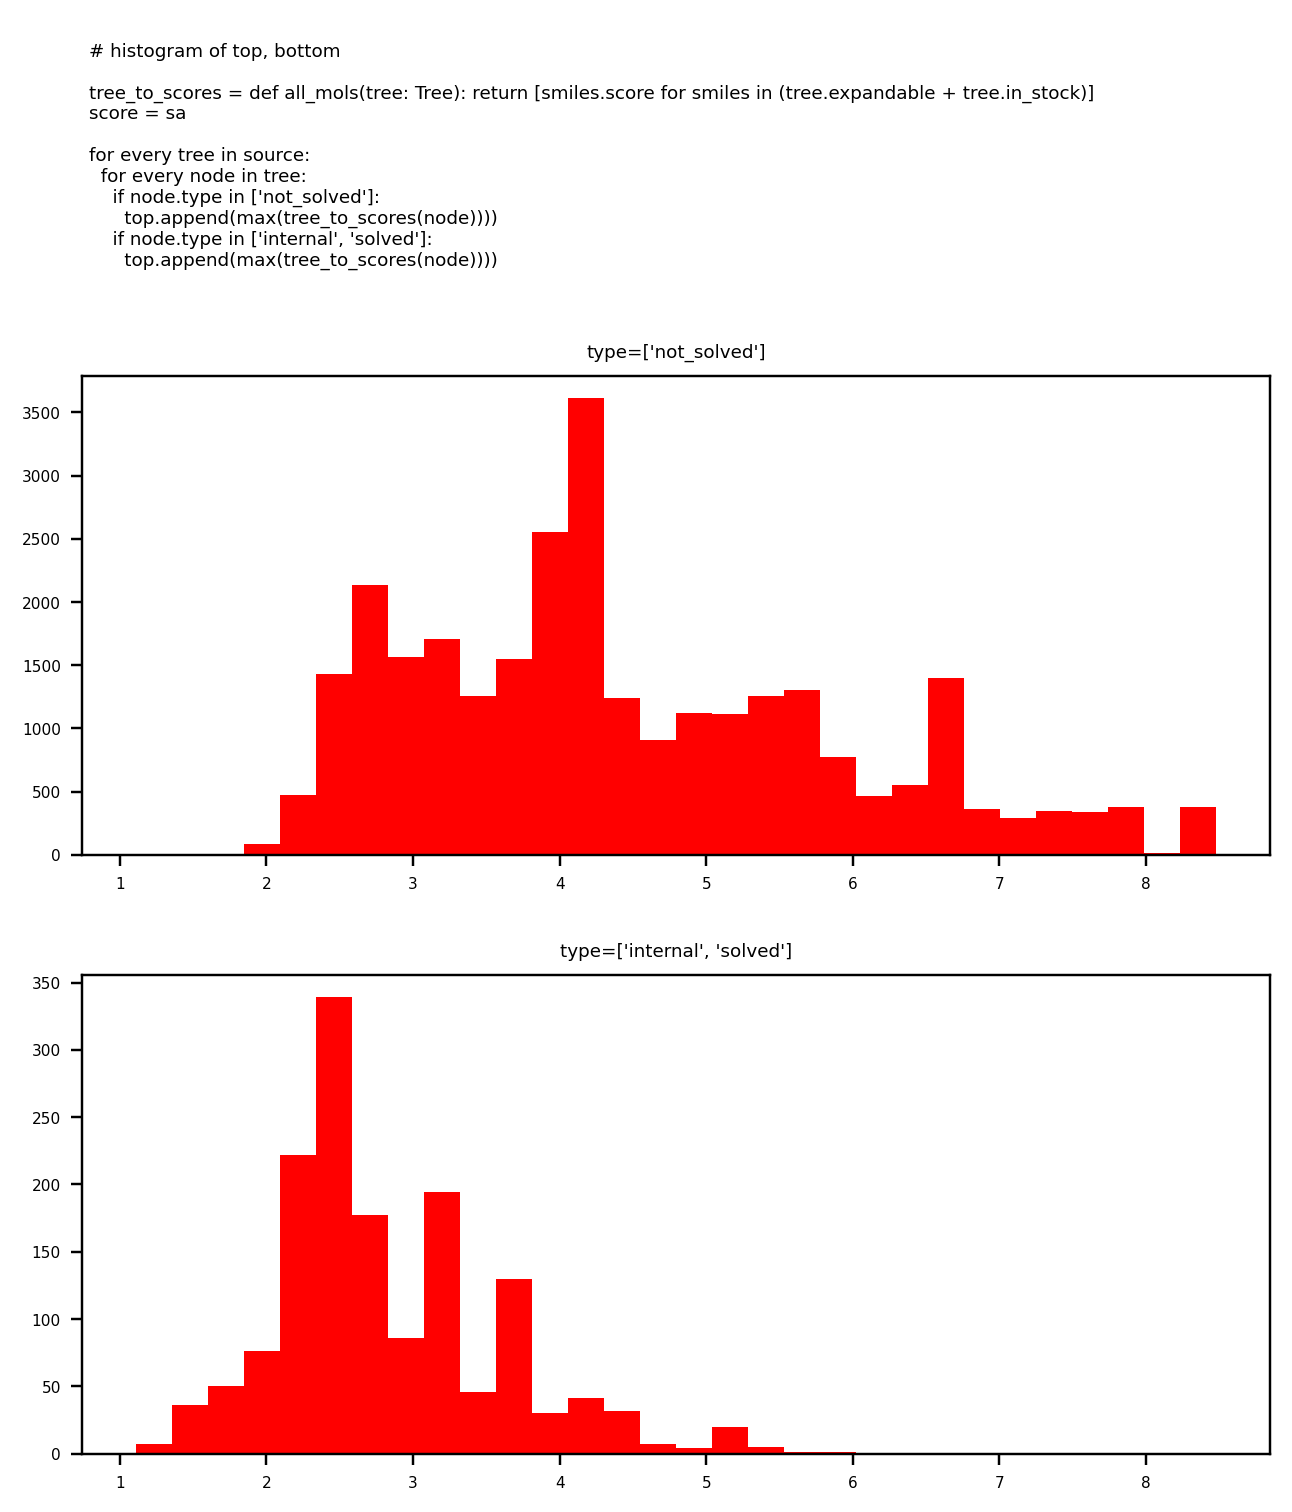

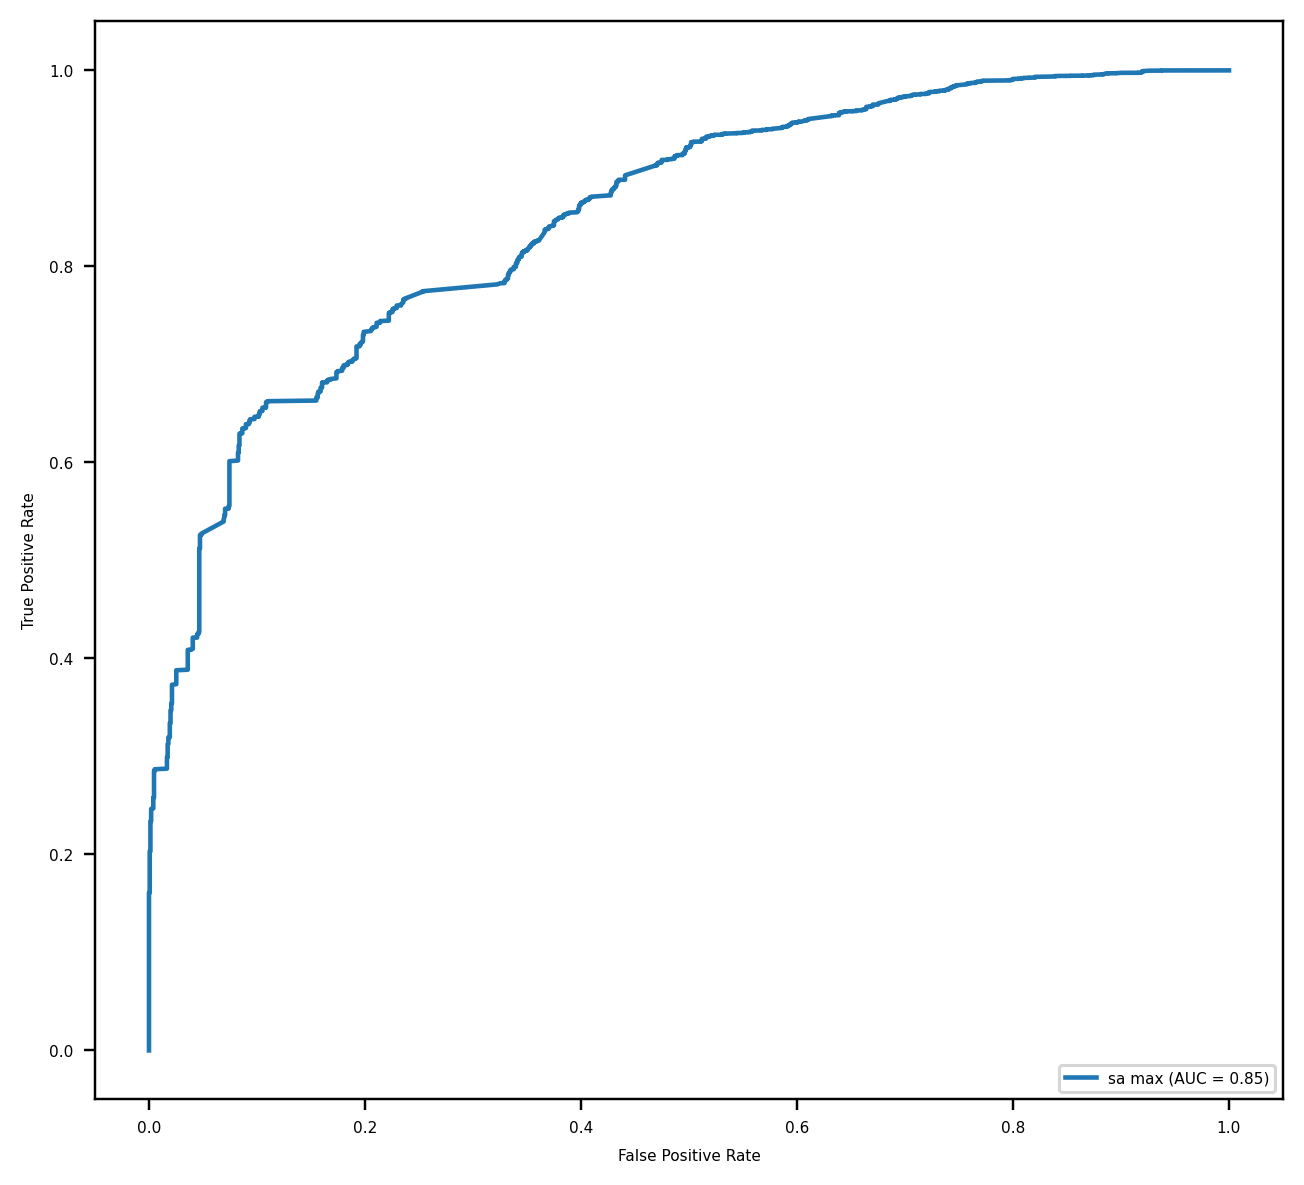

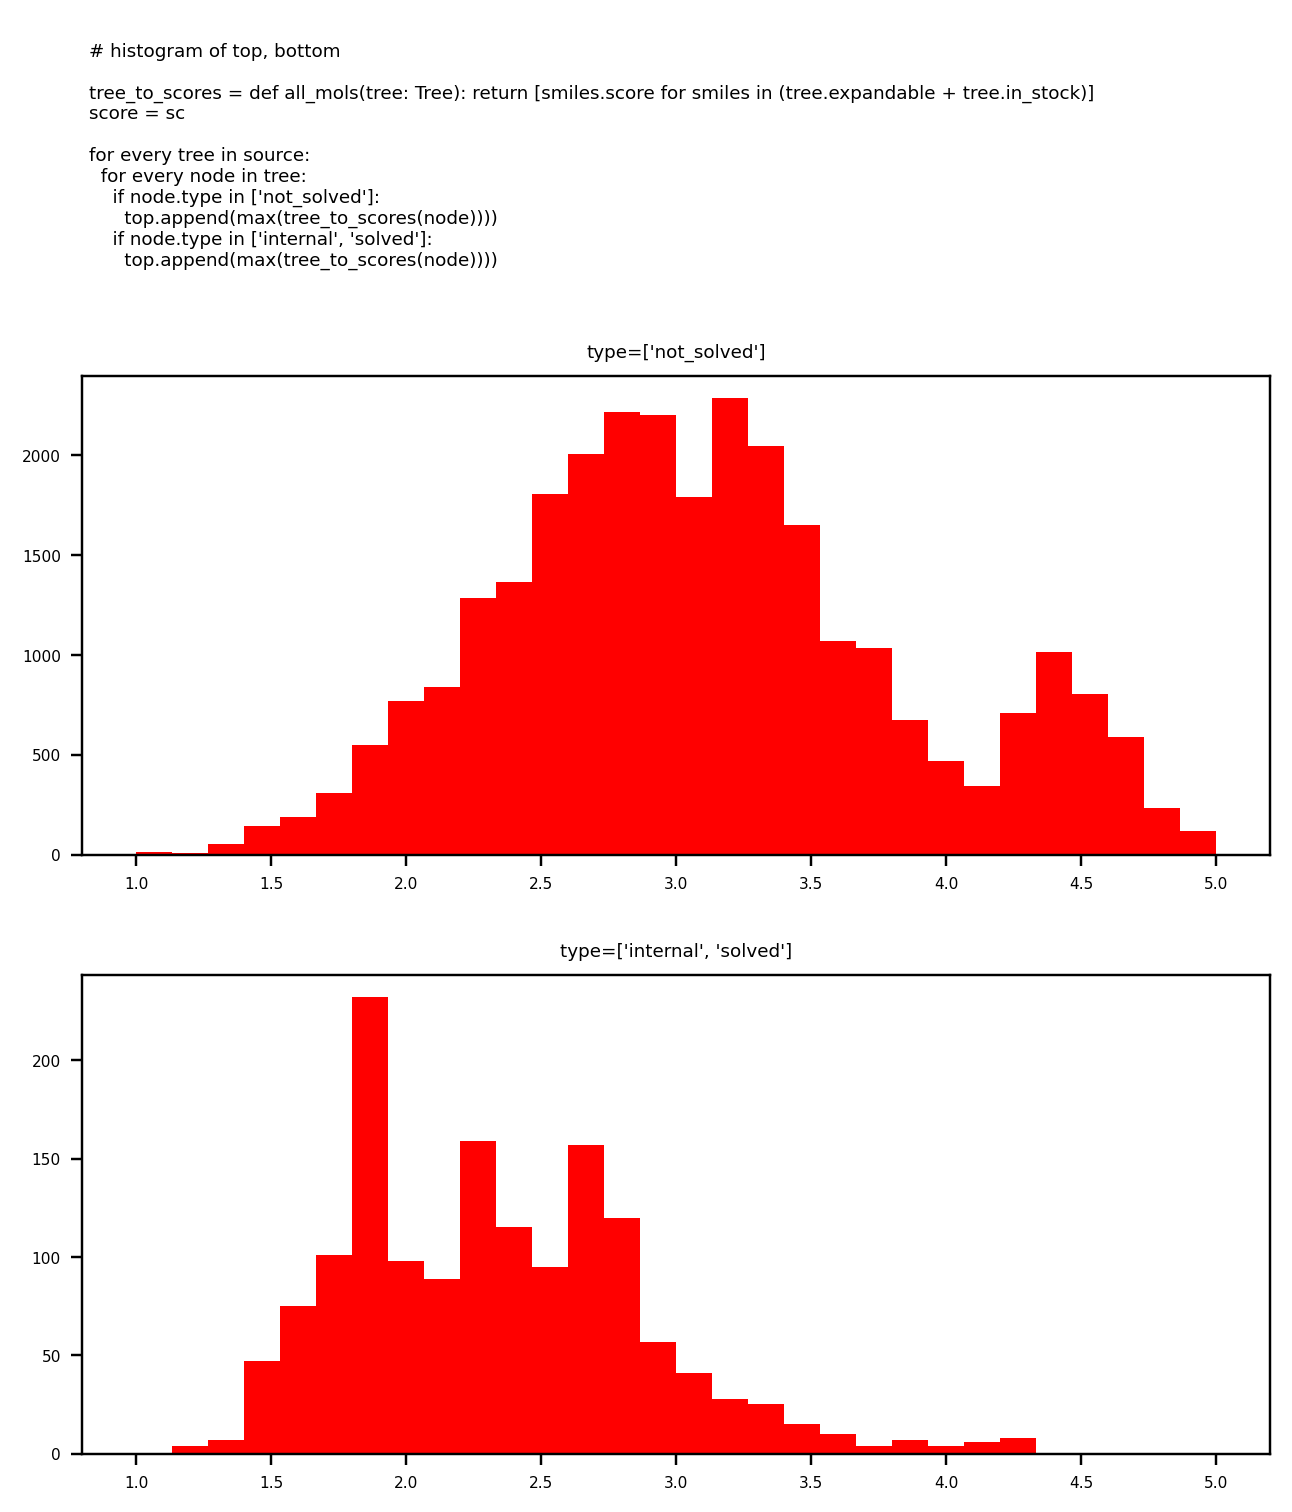

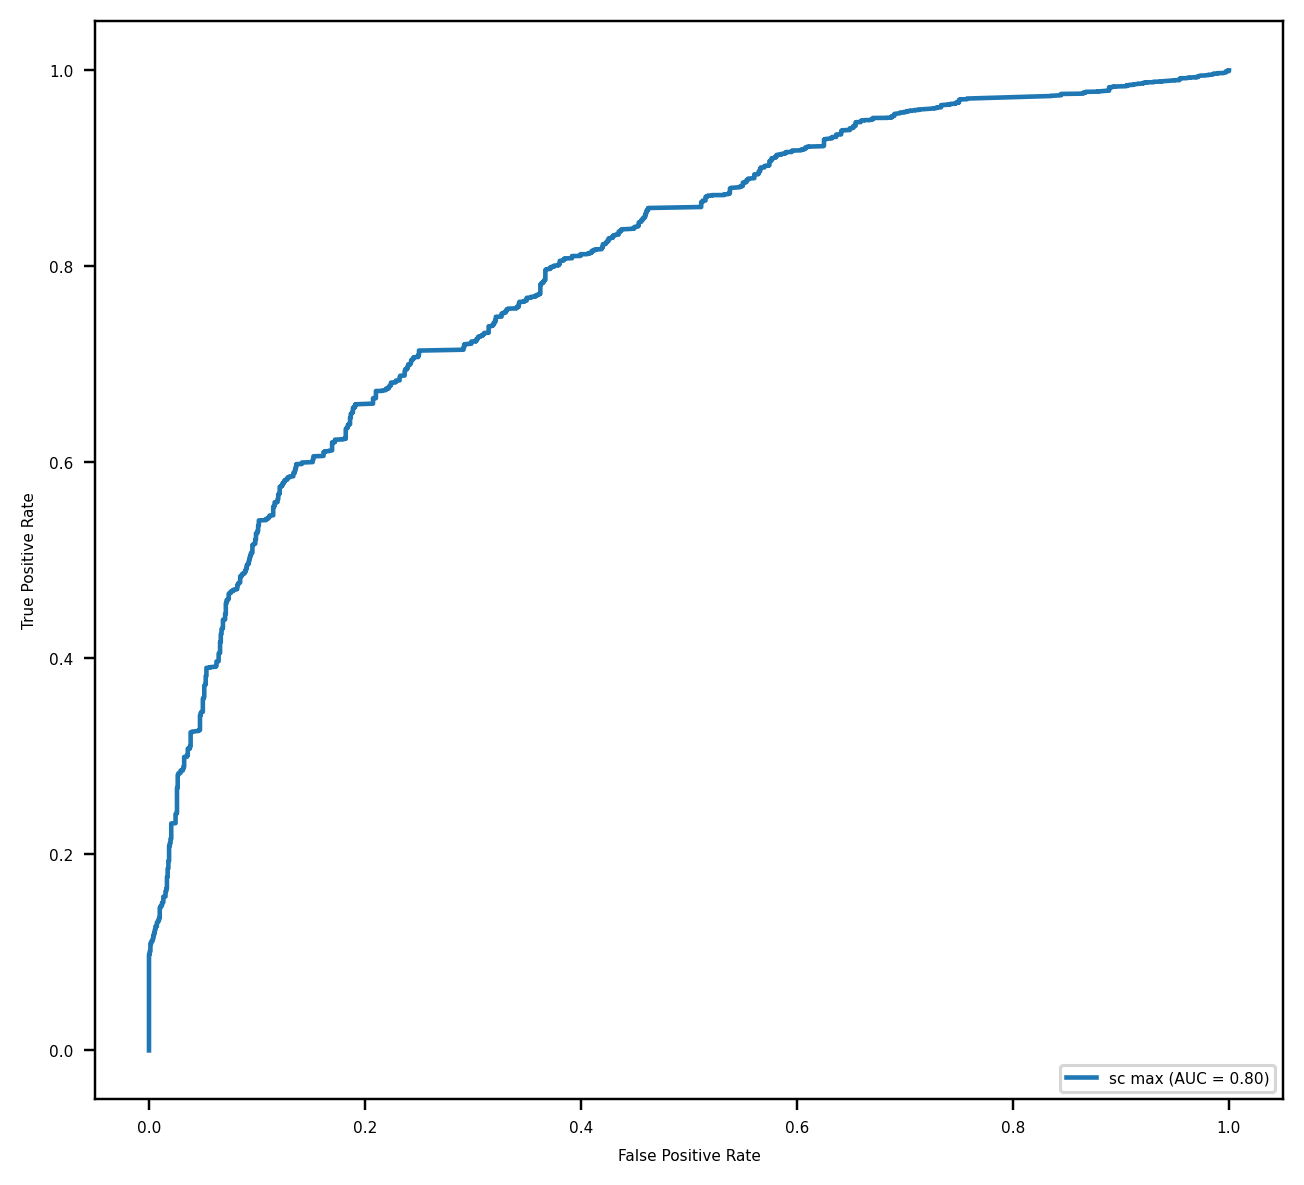

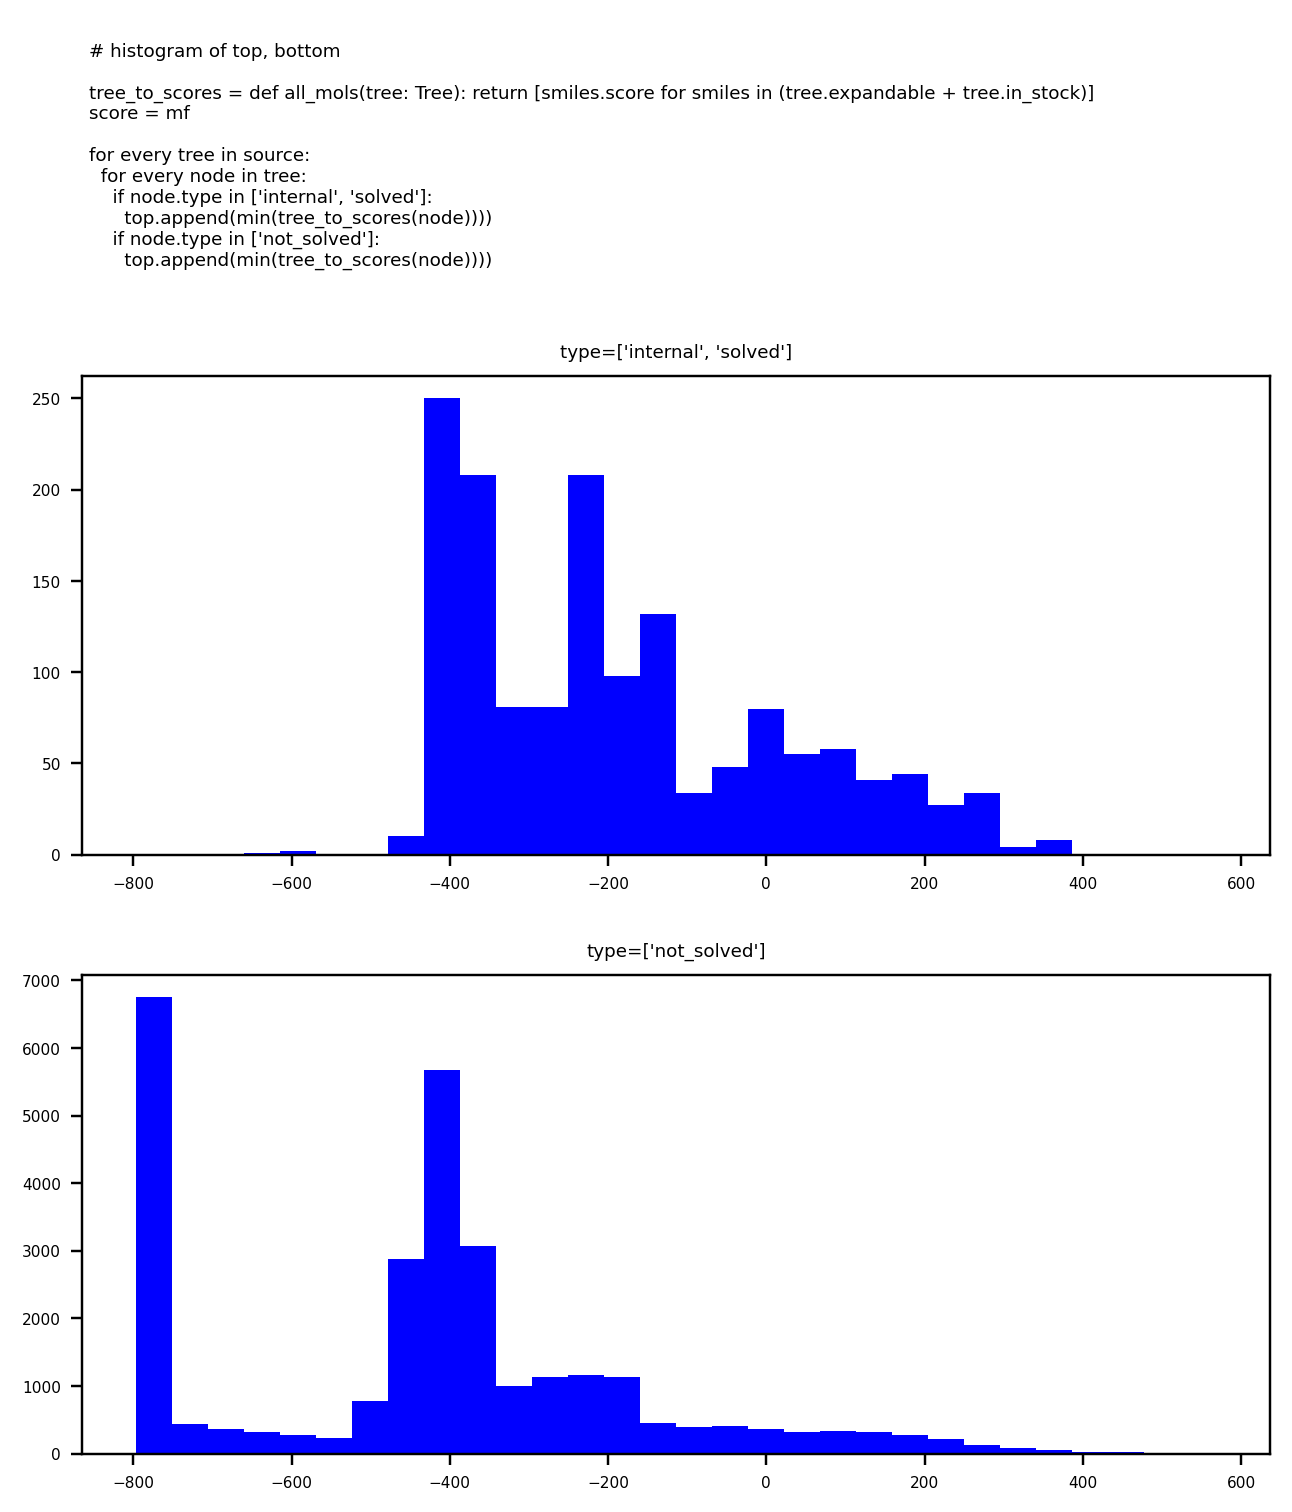

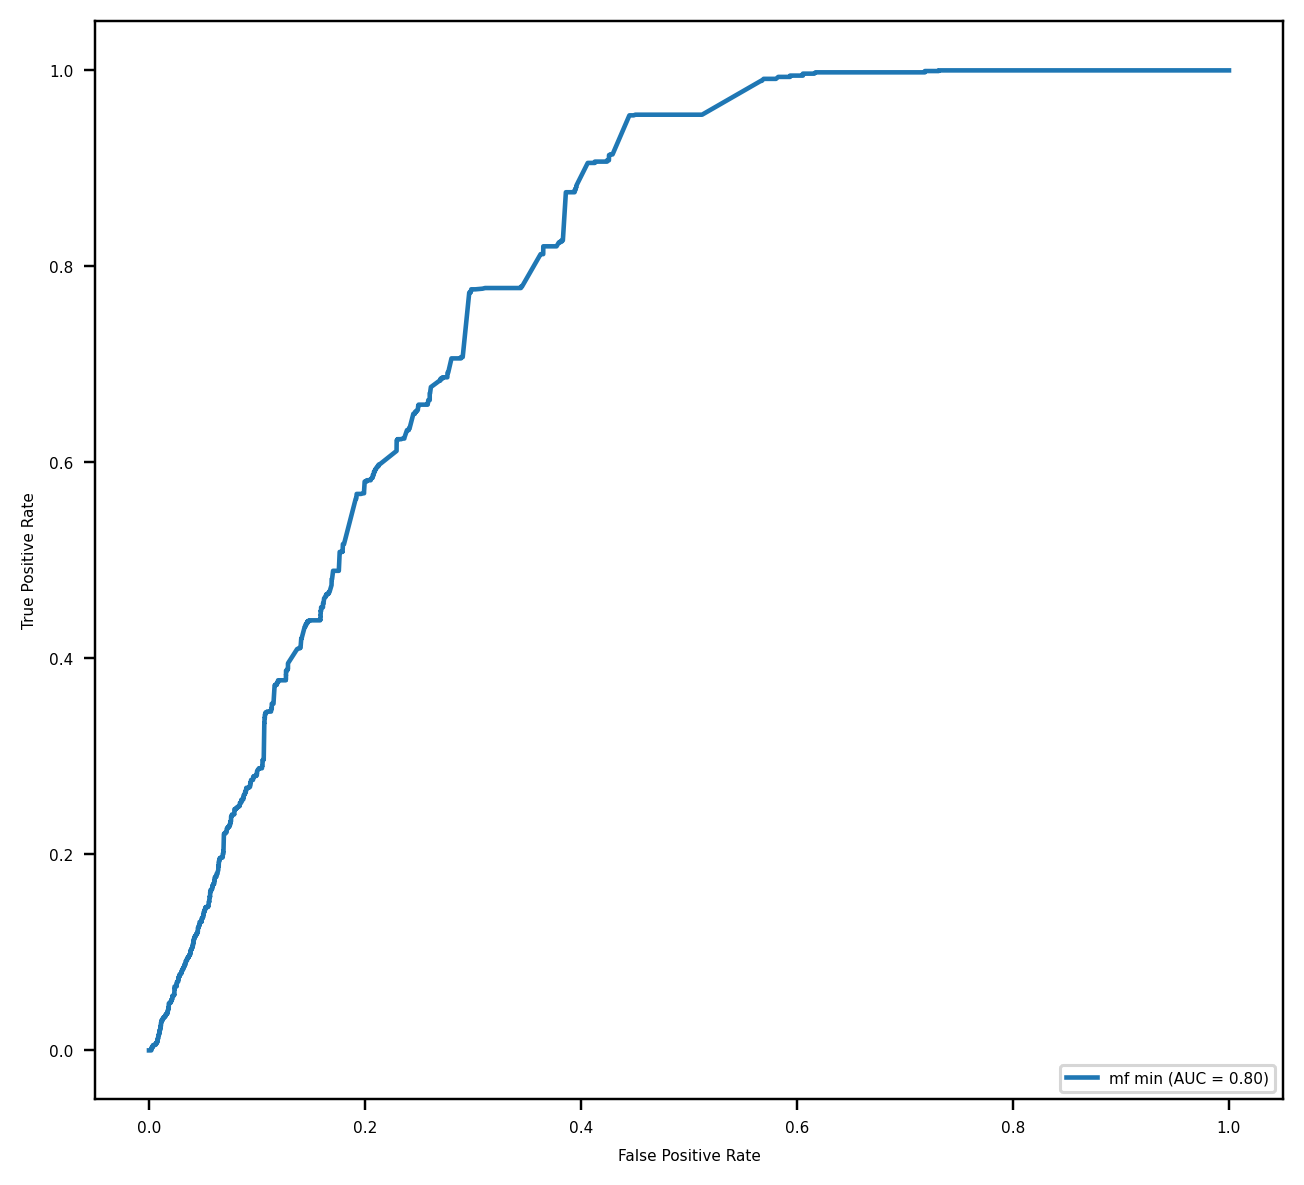

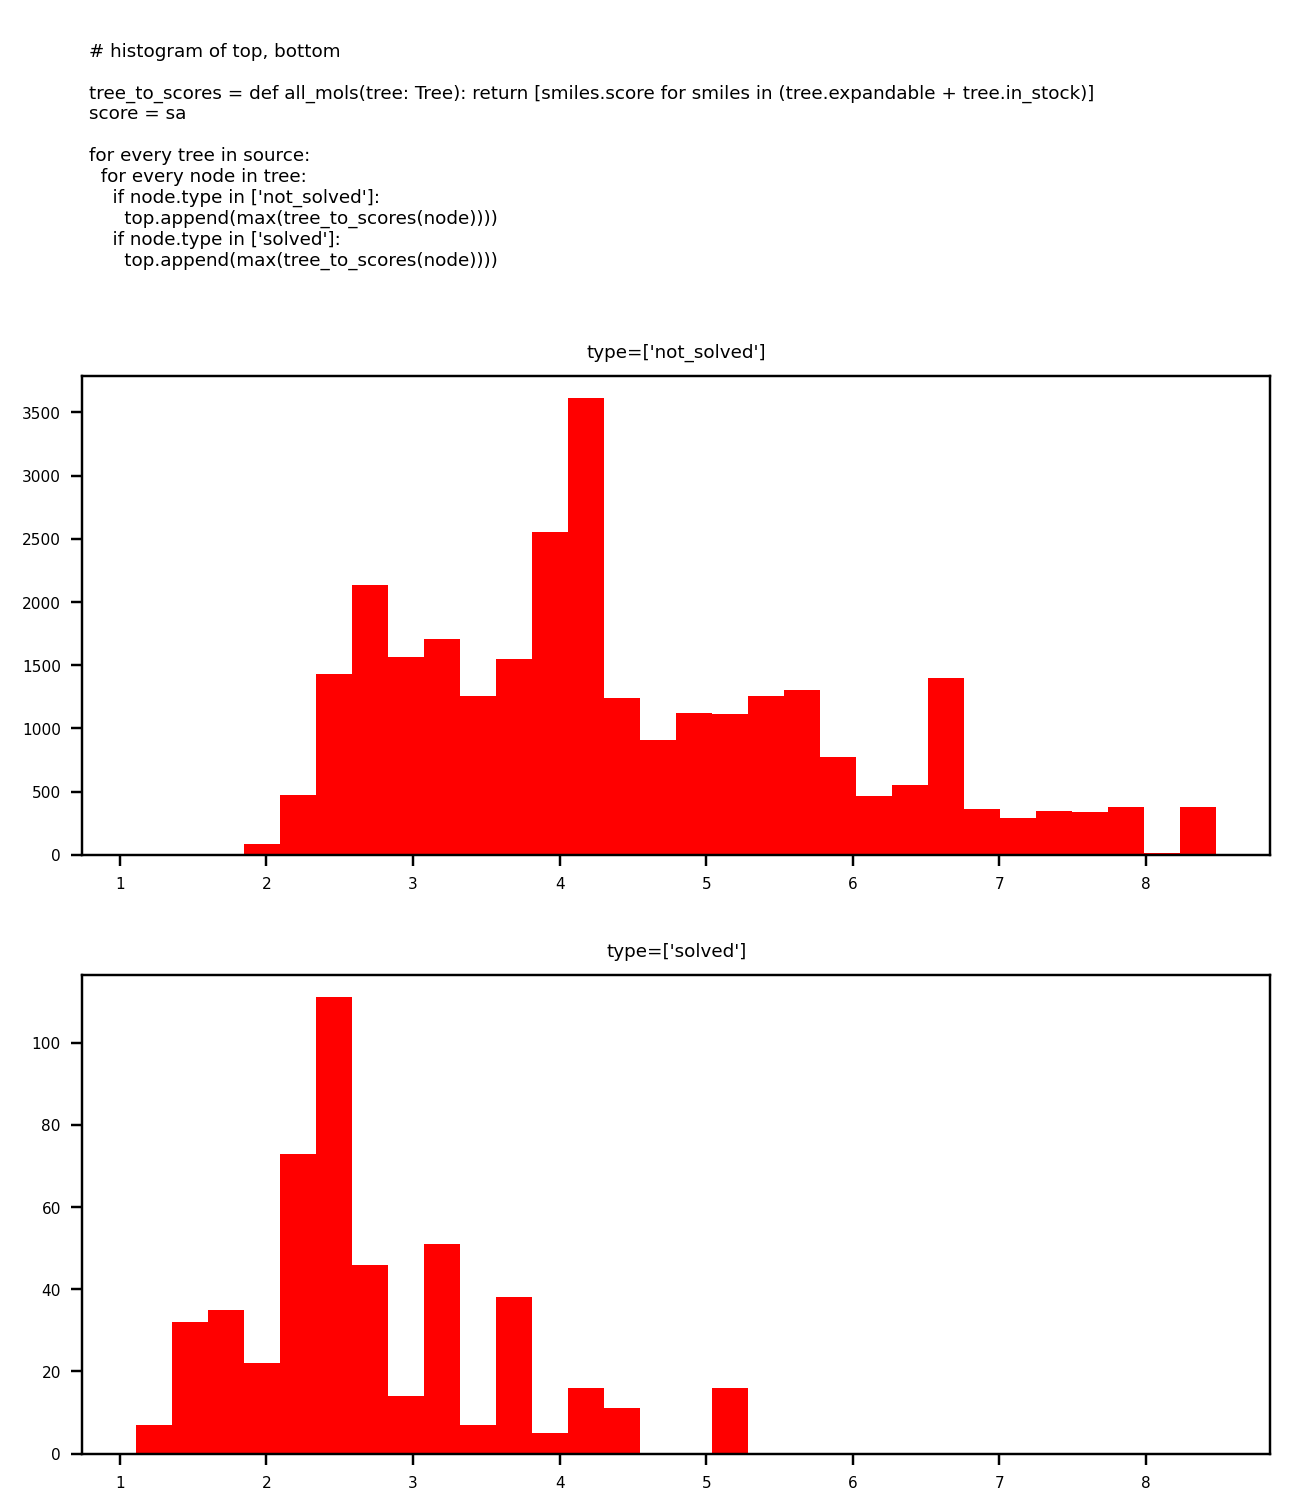

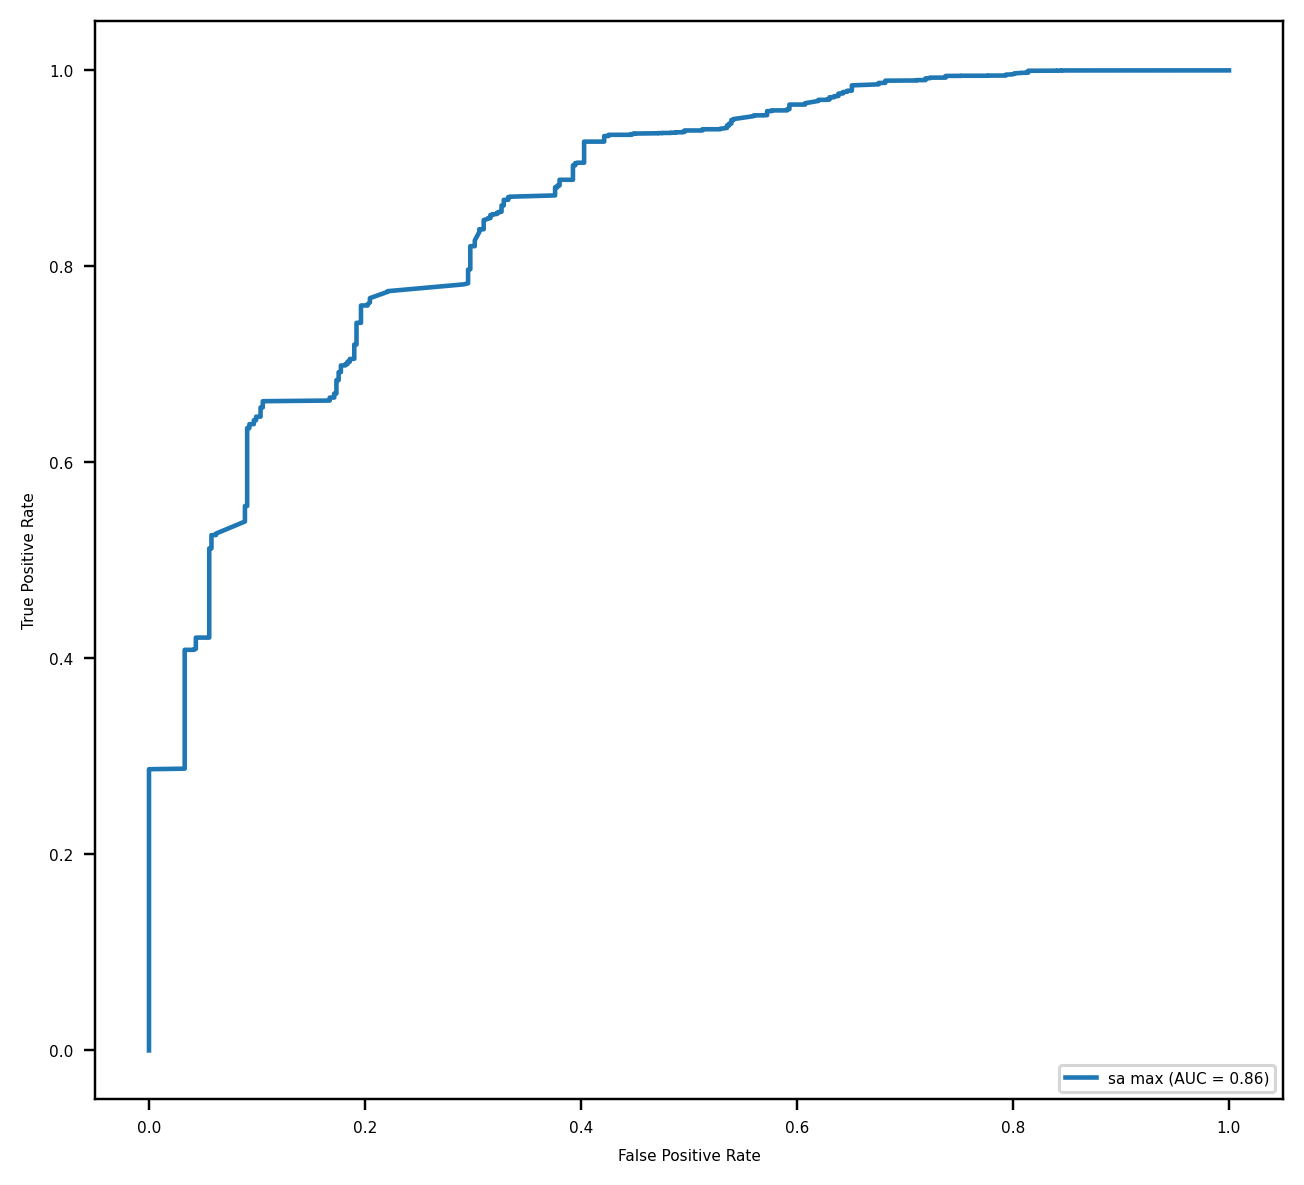

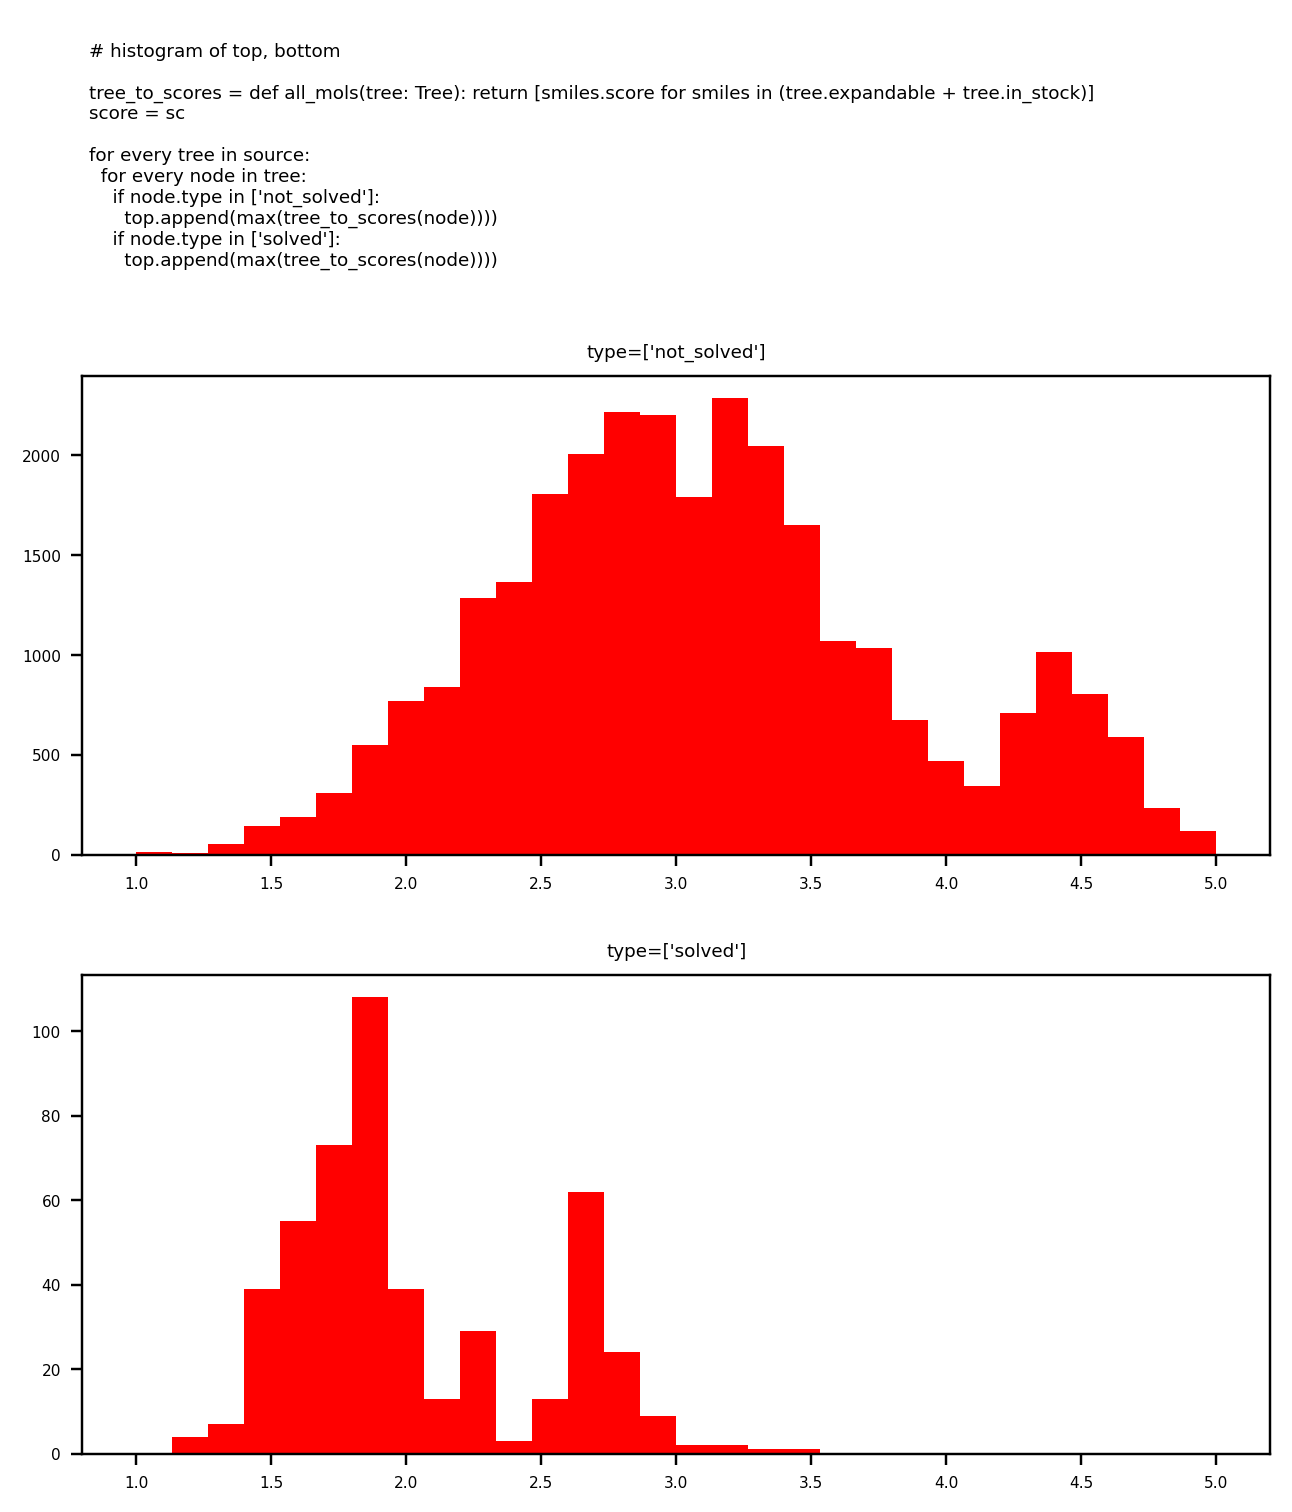

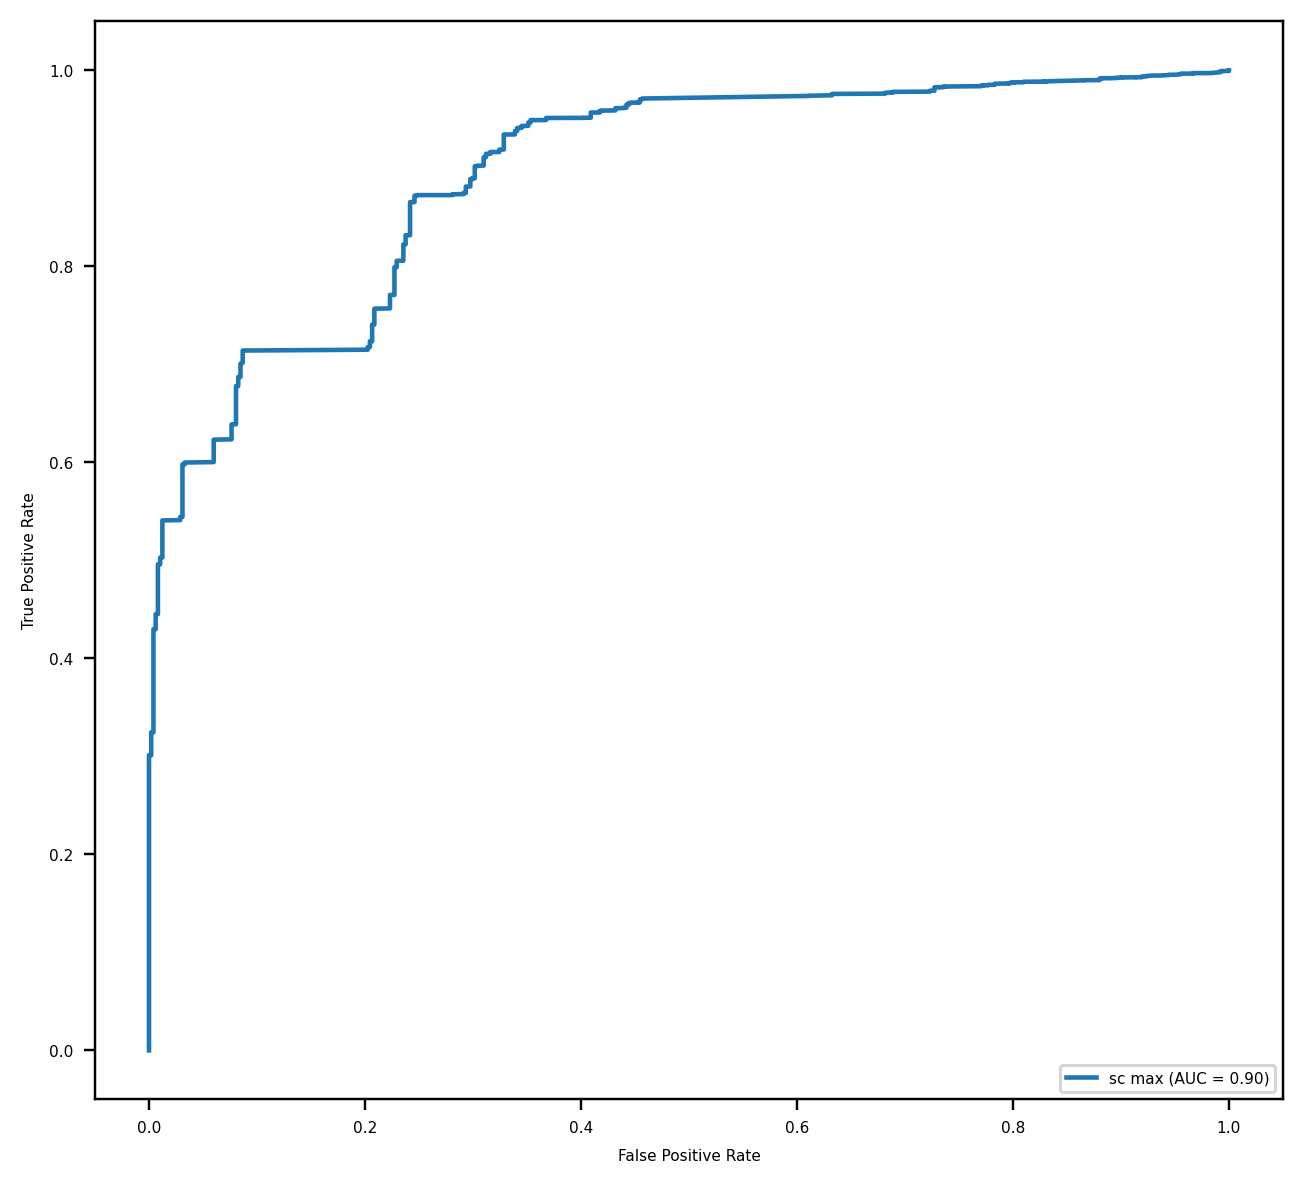

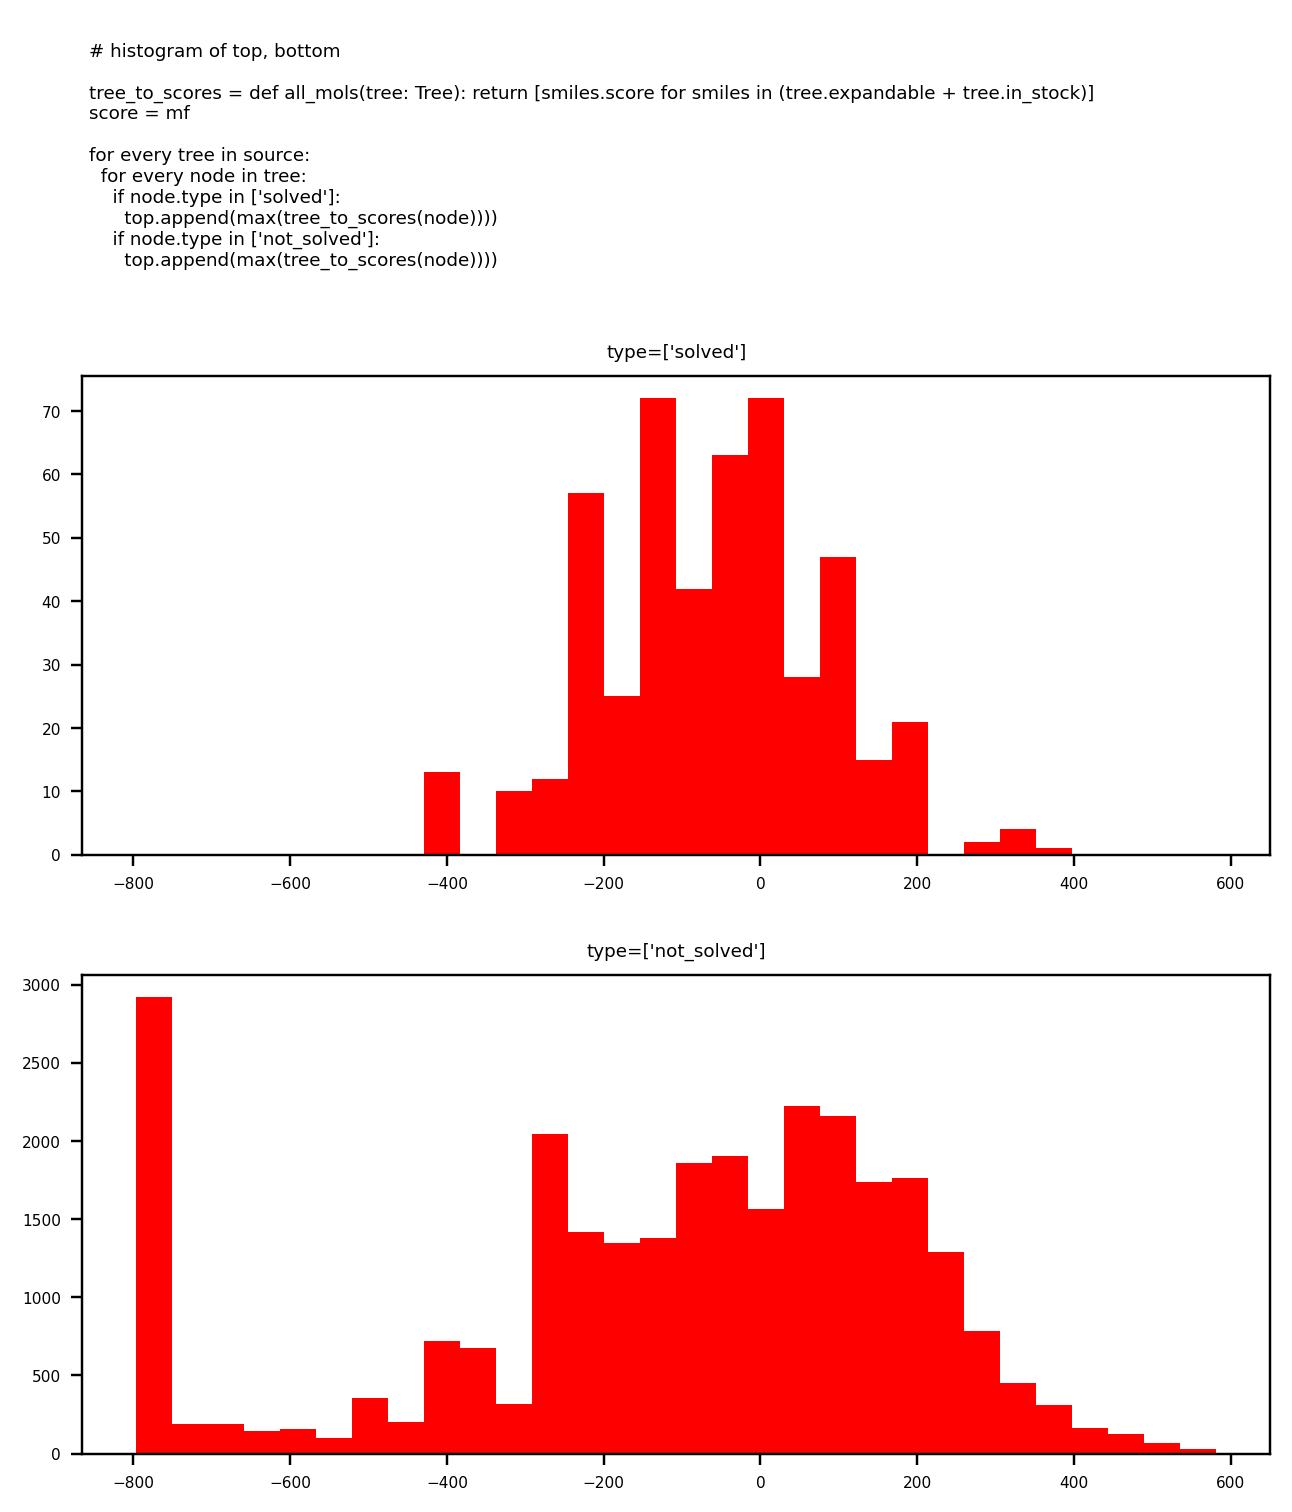

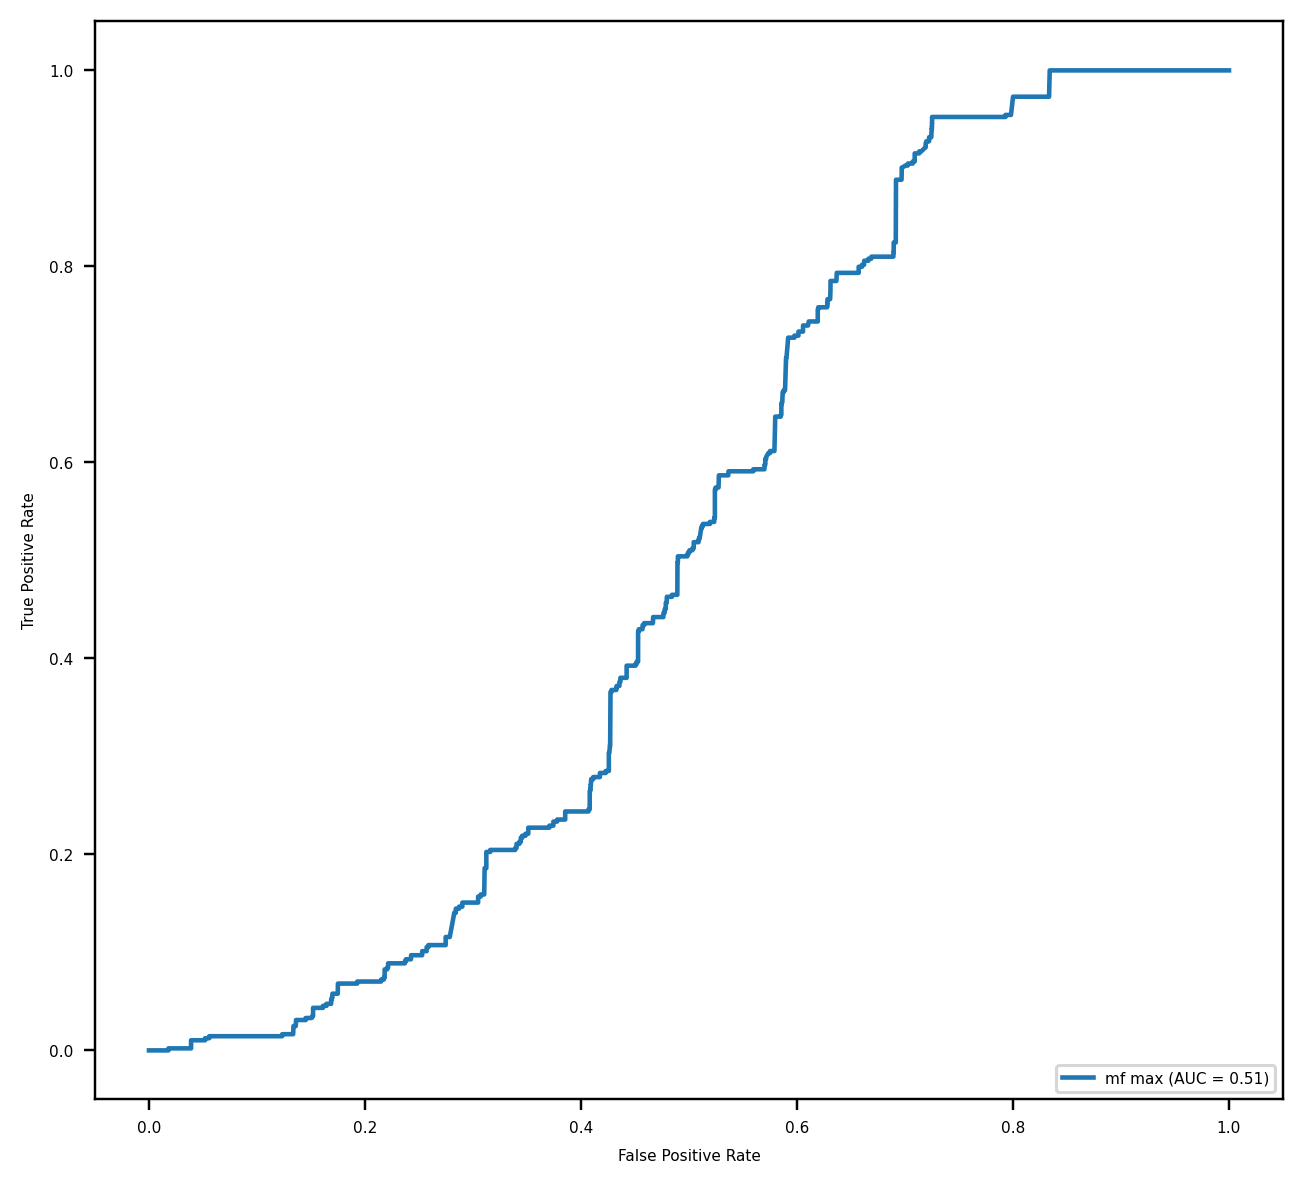

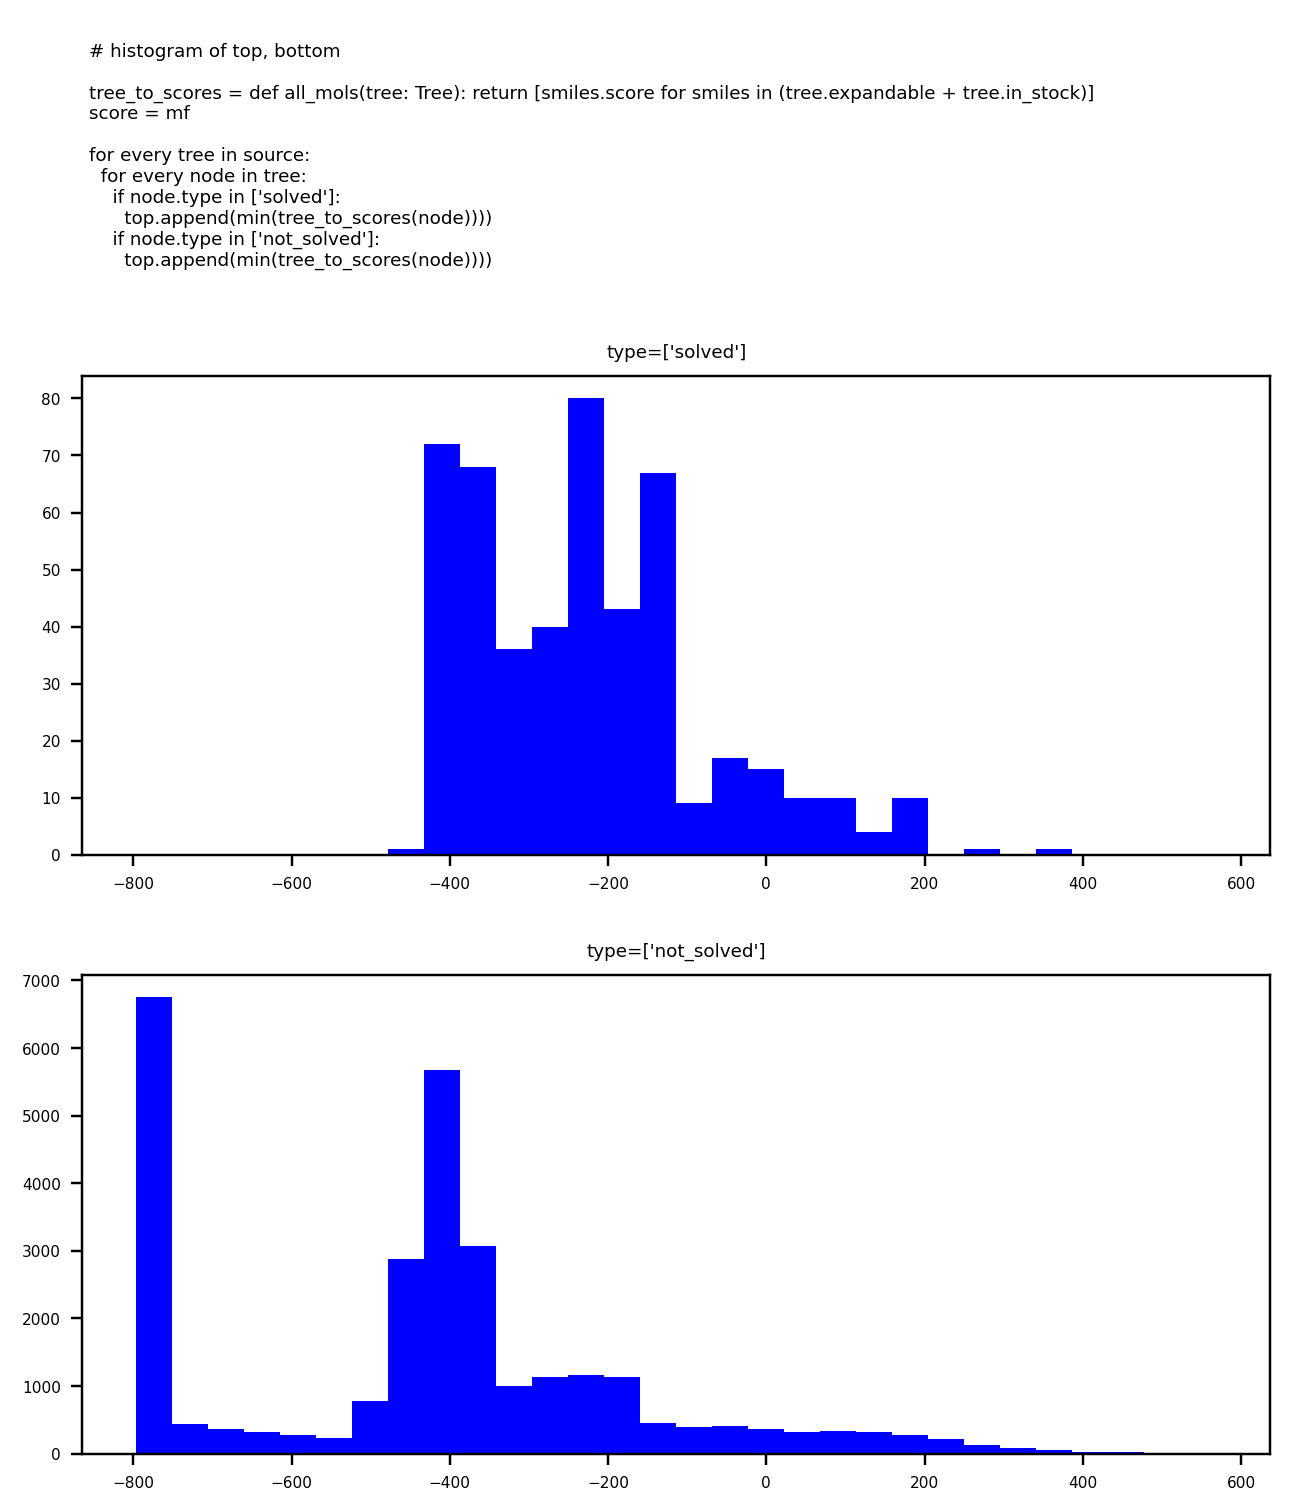

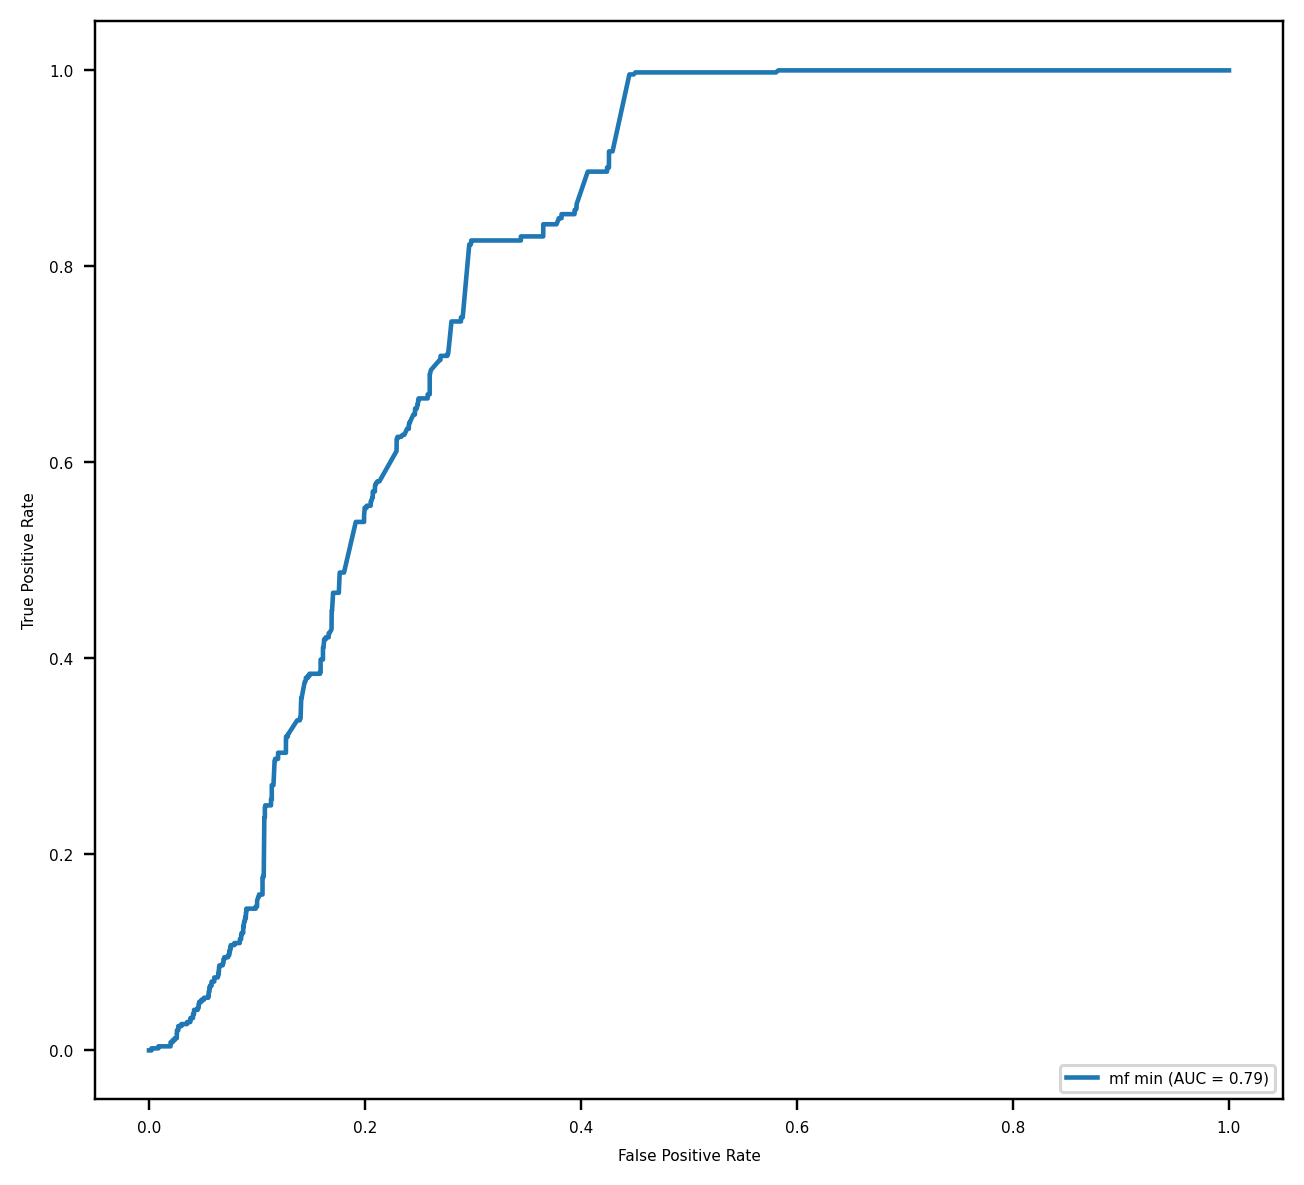

In [9]:
for ttype, btype, agg_tuple, score_getter in [
    f(["not_solved"], ["internal", "solved"], max, sa),
    f(["not_solved"], ["internal", "solved"], max, sc),
    f(["internal", "solved"], ["not_solved"], min, mf),
    f(["not_solved"], ["solved"], max, sa),
    f(["not_solved"], ["solved"], max, sc),
    f(["solved"], ["not_solved"], max, mf),
    f(["solved"], ["not_solved"], min, mf),
]:
    histogram_top_bottom(ttype, btype, all_mols, agg_tuple, score_getter, detailed)

In [10]:
aggs = [min, max, avg]
getters = Score.getters()
ttypes = [["internal", "solved"], ["solved"]]
btypes = [["not_solved"], ["not_solved"]]


tables = get_roc_data(ttypes, btypes, all_mols, agg_list, getters)

In [11]:
print("AUC for all scores")
for table, ttype, btype in zip(tables, ttypes, btypes):
    print(ttype, " <-> ", btype)
    display(tabulate.tabulate(table,tablefmt='html'))

AUC for all scores
['internal', 'solved']  <->  ['not_solved']


sa,min,0.694529
sa,max,0.849295
sa,avg,0.844366
sc,min,0.432871
sc,max,0.801375
sc,avg,0.653429
ra,min,0.80279
ra,max,0.556986
ra,avg,0.79444
mf,min,0.795423
mf,max,0.600175


['solved']  <->  ['not_solved']


sa,min,0.805968
sa,max,0.861277
sa,avg,0.895116
sc,min,0.444099
sc,max,0.89564
sc,avg,0.791036
ra,min,0.839575
ra,max,0.621981
ra,avg,0.840614
mf,min,0.790246
mf,max,0.50778
